## EDA dengan Visualisasi Data

In [5]:
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/SuperStore.csv')

df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])

In [7]:
df.head()

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,Bush Somerset Collection Bookcase,2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,2019-06-12,2019-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South


## Summary data dengan pivot_table

In [8]:
pd.pivot_table(
    data=df,
    index='Category',
    values='Sales',
    aggfunc='sum'
)

,Sales
Category,
Furniture,741999.7953
Office Supplies,719047.0320
Technology,836154.0330


In [9]:
pd.pivot_table(
    data=df,
    index='Category',
    columns='Region',
    values='Sales',
    aggfunc='sum'
)

Region,Central,East,South,West
Category,,,,
Furniture,163797.1638,208291.204,117298.684,252612.7435
Office Supplies,167026.4150,205516.055,125651.313,220853.2490
Technology,170416.3120,264973.981,148771.908,251991.8320


In [10]:
pd.pivot_table(
    data=df,
    index='Category',
    columns=['Region','Segment'],
    values='Sales',
    aggfunc='sum'
)

Region             Central                                East             \
Segment           Consumer   Corporate Home Office    Consumer  Corporate   
Category                                                                    
Furniture        86229.219  52085.6018   25482.343  114211.802  64209.046   
Office Supplies  93111.479  41137.7010   32777.235  101255.136  66474.735   
Technology       72690.736  64772.5100   32953.066  135441.229  69725.566   

Region                           South                                West  \
Segment         Home Office   Consumer   Corporate Home Office    Consumer   
Category                                                                     
Furniture         29870.356  70800.204  29645.0315  16853.4485  119808.087   
Office Supplies   37786.184  59504.581  45930.1700  20216.5620  110080.940   
Technology        59807.186  65276.186  46310.7310  37184.9910  132991.746   

Region                                   
Segment           Corporate Home Office  
Category                                 
Furniture        83080.1065   49724.550  
Office Supplies  77133.8560   33638.453  
Technology       65641.3120   53358.774

## Line

In [11]:
# Simple

data = pd.pivot_table(
    data=df,
    index='Order_Date',
    values='Sales',
    aggfunc='sum'
).reset_index()

data.head()

,Order_Date,Sales
0,2017-01-03,16.448
1,2017-01-04,288.060
2,2017-01-05,19.536
3,2017-01-06,4407.100
4,2017-01-07,87.158


<Axes: xlabel='Order_Date', ylabel='Sales'>

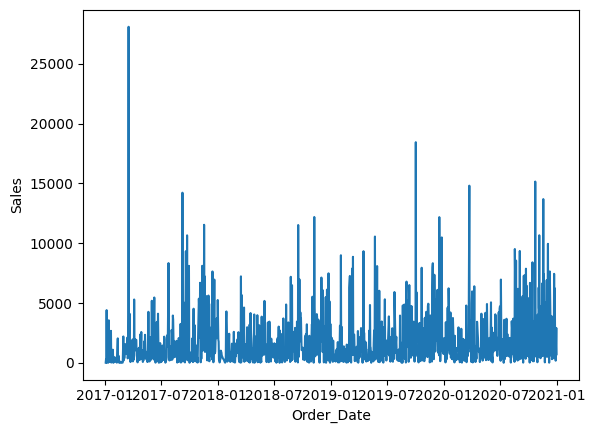

In [12]:
sns.lineplot(
    data=data,
    x='Order_Date',
    y='Sales'
    )

In [13]:
# Multiple line

data = pd.pivot_table(
    data=df,
    index=['Order_Date','Category'],
    values='Sales',
    aggfunc='sum'
).reset_index()

data.head()

,Order_Date,Category,Sales
0,2017-01-03,Office Supplies,16.448
1,2017-01-04,Office Supplies,288.060
2,2017-01-05,Office Supplies,19.536
3,2017-01-06,Furniture,2573.820
4,2017-01-06,Office Supplies,685.340


<Axes: xlabel='Order_Date', ylabel='Sales'>

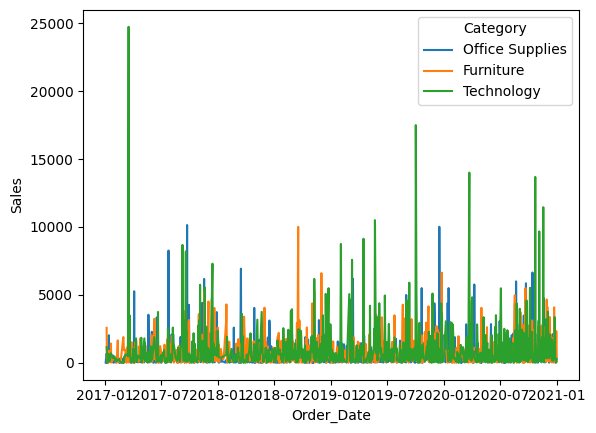

In [14]:
sns.lineplot(
    data=data,
    x='Order_Date',
    y='Sales',
    hue='Category'
    )

## Barplot

In [15]:
data = pd.pivot_table(
    data=df,
    index='Segment',
    values='Sales',
    aggfunc='sum'
).reset_index()

data.head()

,Segment,Sales
0,Consumer,1.161401e+06
1,Corporate,7.061464e+05
2,Home Office,4.296531e+05


<Axes: xlabel='Segment', ylabel='Sales'>

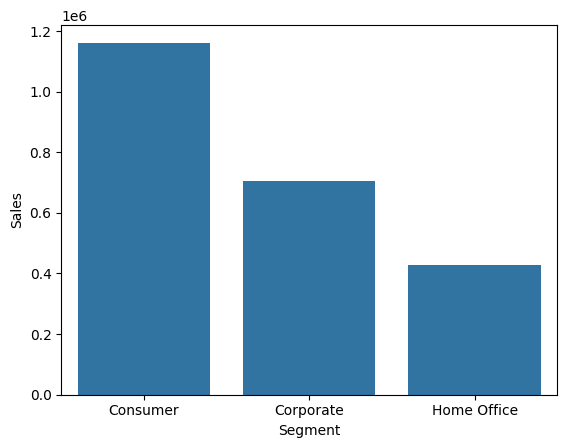

In [16]:
sns.barplot(data=data, x='Segment', y='Sales')

In [17]:
data = pd.pivot_table(
    data=df,
    index=['Segment','Region'],
    values='Sales',
    aggfunc='sum'
).reset_index()

data.head()

,Segment,Region,Sales
0,Consumer,Central,252031.4340
1,Consumer,East,350908.1670
2,Consumer,South,195580.9710
3,Consumer,West,362880.7730
4,Corporate,Central,157995.8128


<Axes: xlabel='Segment', ylabel='Sales'>

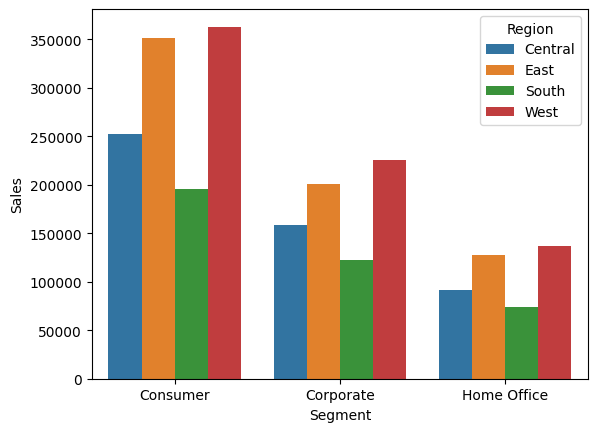

In [18]:
sns.barplot(data=data, x='Segment', y='Sales', hue='Region')

## Scatterplot

<Axes: xlabel='Sales', ylabel='Profit'>

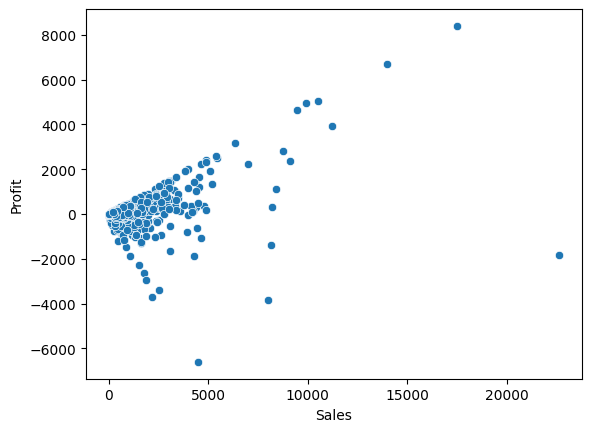

In [19]:
sns.scatterplot(data=df, x='Sales', y='Profit')

<Axes: xlabel='Sales', ylabel='Profit'>

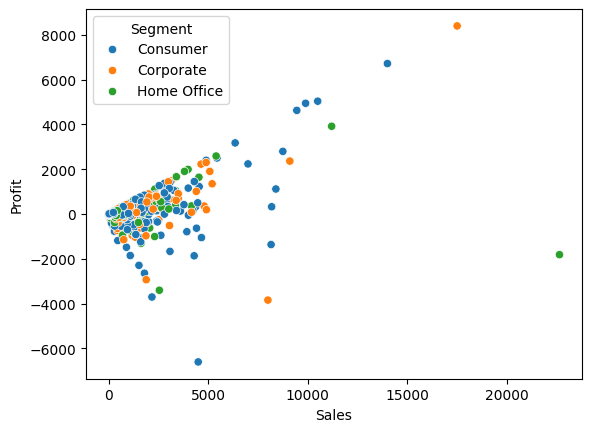

In [20]:
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Segment')

## Distplot

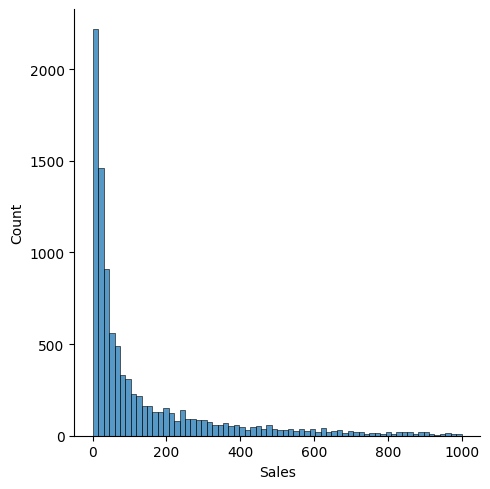

In [21]:
sns.displot(df[df['Sales'] < 1000]['Sales'])

## Heatmap

In [22]:
data = pd.pivot_table(
    data=df,
    index='State',
    columns='Category',
    values='Sales',
    aggfunc='sum'
)

<Axes: xlabel='Category', ylabel='State'>

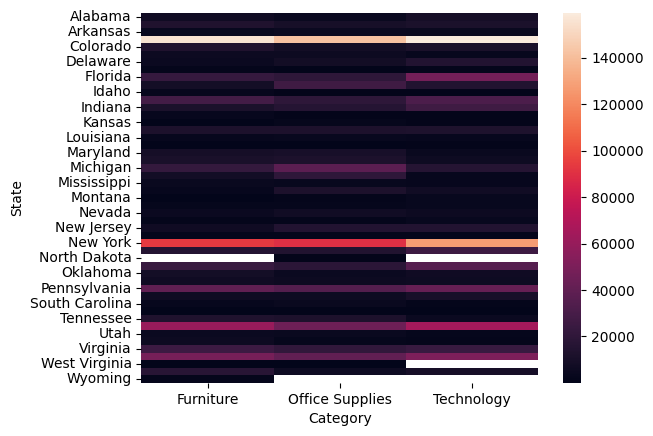

In [23]:
sns.heatmap(data)

<br>
<a href="https://www.linkedin.com/in/raihanarique/"><img src="https://img.shields.io/badge/-© 2025 Raihan Ariq Muzakki-417DAC?style=for-the-badge&logoColor=white"/></a>